In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
%matplotlib inline
from pandas_datareader.data import DataReader
from datetime import datetime


In [0]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

data = {}

for stock in tech_list:   
    data[stock] = DataReader(stock, 'yahoo', start, end)


In [4]:
data['AAPL'].head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-05-28,180.589996,177.910004,178.919998,178.229996,27948200.0,176.128006
2019-05-29,179.350006,176.000000,176.419998,177.380005,28481200.0,175.288025
2019-05-30,179.229996,176.669998,177.949997,178.300003,21218400.0,176.197189
2019-05-31,177.990005,174.990005,176.229996,175.070007,27043600.0,173.005280
2019-06-03,177.919998,170.270004,175.600006,173.300003,40396100.0,171.256134


In [5]:
print(data['AAPL'].info())
# No null values

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-05-28 to 2020-05-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       253 non-null    float64
 1   Low        253 non-null    float64
 2   Open       253 non-null    float64
 3   Close      253 non-null    float64
 4   Volume     253 non-null    float64
 5   Adj Close  253 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB
None


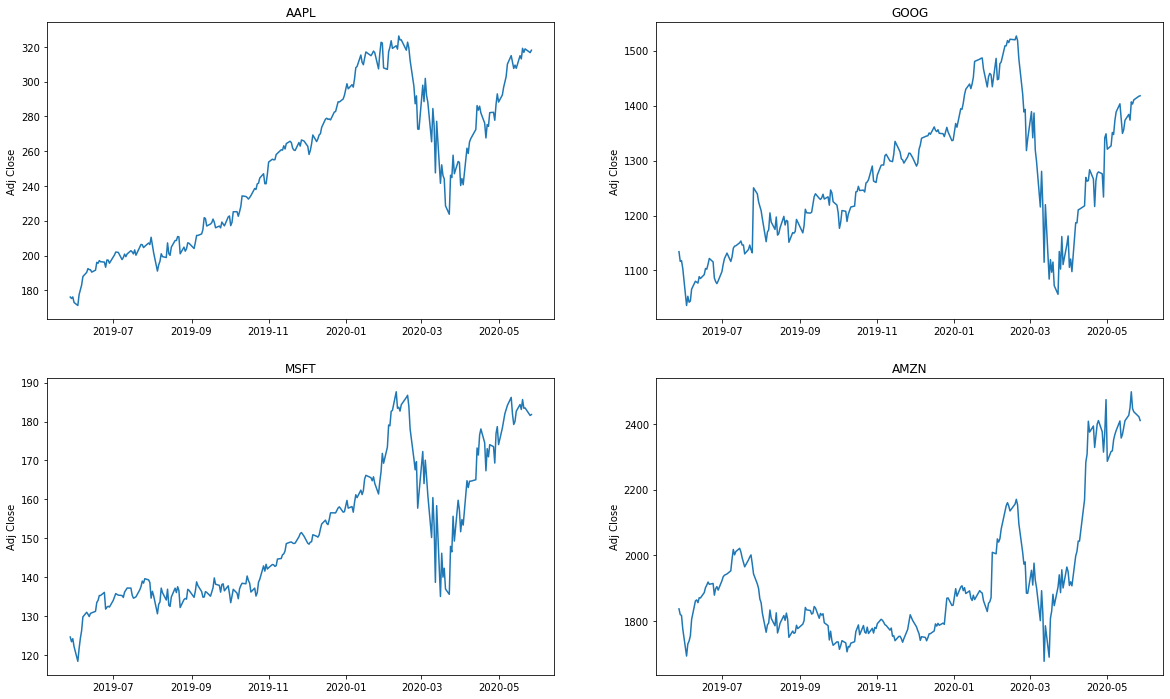

In [6]:
plt.figure(figsize = (20,12))
i = 1
for comp,df in data.items():
    plt.subplot(2,2,i)
    plt.plot(df['Adj Close'])
    plt.ylabel('Adj Close')
    plt.title(str(comp))
    i = i + 1


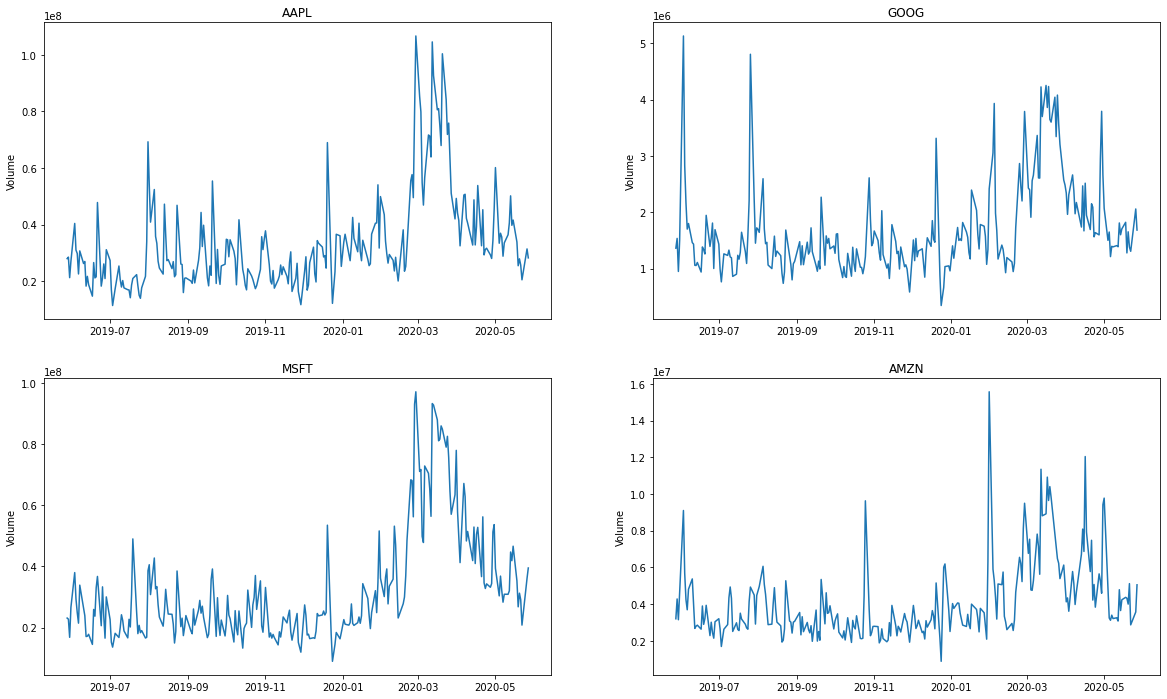

In [7]:
plt.figure(figsize = (20,12))
i = 1
for comp,df in data.items():
    plt.subplot(2,2,i)
    plt.plot(df['Volume'])
    plt.ylabel('Volume')
    plt.title(str(comp))
    i = i + 1


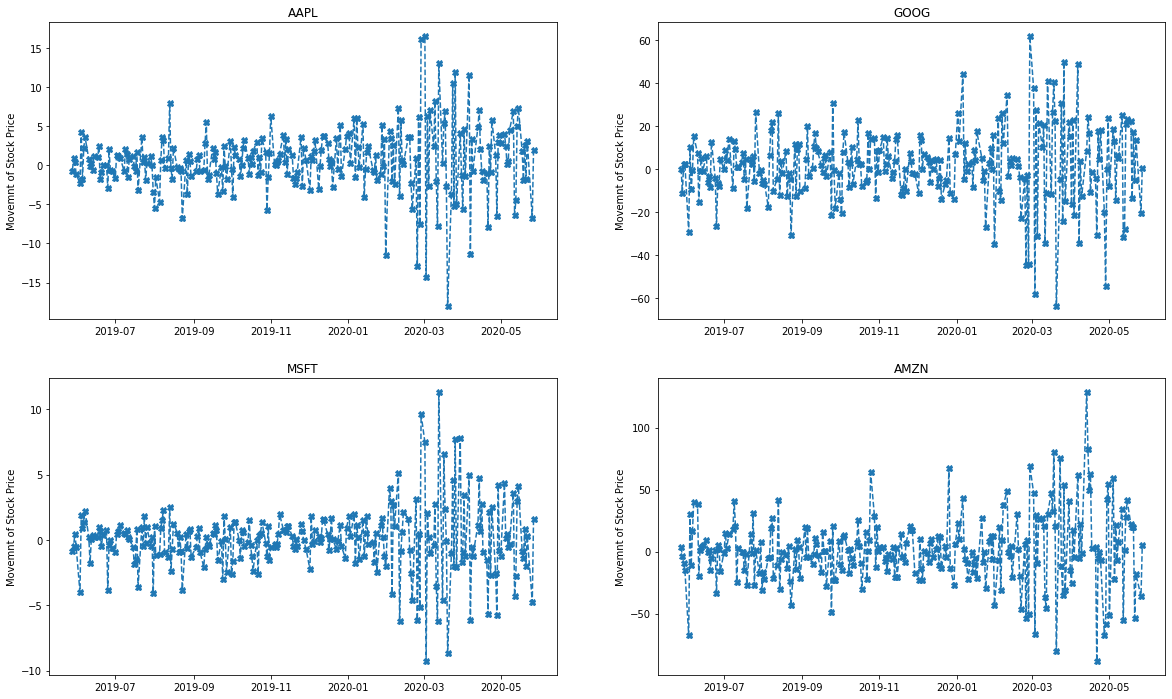

In [8]:
#Daily Momevement
plt.figure(figsize = (20,12))
i = 1
for comp,df in data.items():
    plt.subplot(2,2,i)
    plt.plot(df['Close'] - df['Open'],linestyle='--',marker = 'X')
    plt.ylabel('Movemnt of Stock Price')
    plt.title(str(comp))
    i = i + 1


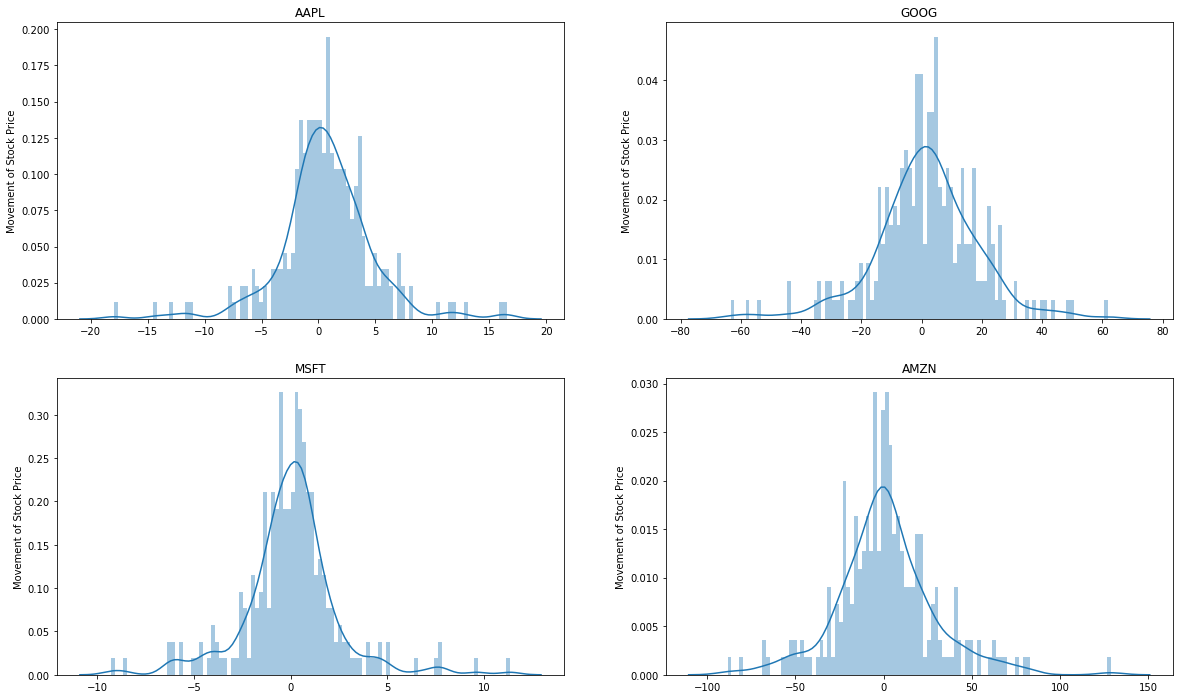

In [9]:
#Daily Momevement
plt.figure(figsize = (20,12))
i = 1
for comp,df in data.items():
    plt.subplot(2,2,i)
    sns.distplot(df['Close'] - df['Open'],bins = 100)
    plt.ylabel('Movement of Stock Price')
    plt.title(str(comp))
    i = i + 1

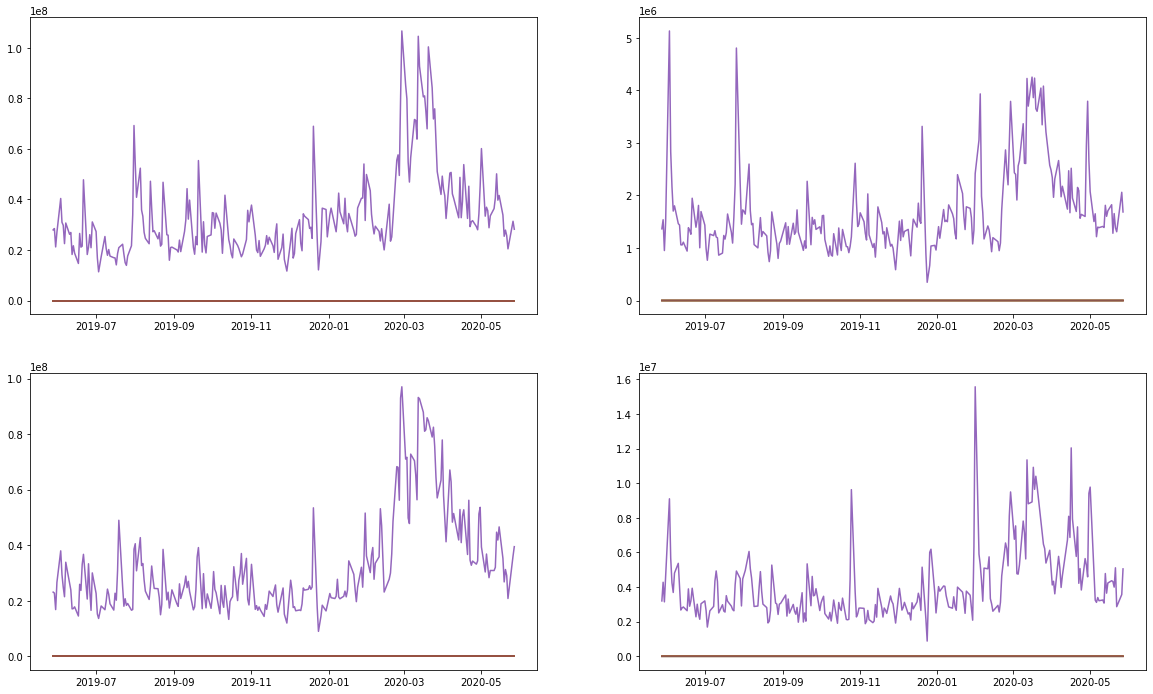

In [10]:
i = 1
plt.figure(figsize = (20,12))

for df in data.values():
    
    plt.subplot(2,2,i)
    plt.plot(df)
    i = 1 + i



In [0]:
close_data = {}
# We import only the closing data 

for i in tech_list:
    close_data[i] = DataReader(i, 'yahoo', start, end)['Adj Close']

In [12]:
close_data['AAPL']

Date
2019-05-28    176.128006
2019-05-29    175.288025
2019-05-30    176.197189
2019-05-31    173.005280
2019-06-03    171.256134
                 ...    
2020-05-20    319.230011
2020-05-21    316.850006
2020-05-22    318.890015
2020-05-26    316.730011
2020-05-27    318.109985
Name: Adj Close, Length: 253, dtype: float64

In [0]:
#Now we try to figure out how much the stock prices has moved w.r.t to the start date.

for i in tech_list:
    close_data[i] = close_data[i].pct_change()

In [14]:
close_data['AAPL'].head()

Date
2019-05-28         NaN
2019-05-29   -0.004769
2019-05-30    0.005187
2019-05-31   -0.018116
2019-06-03   -0.010110
Name: Adj Close, dtype: float64

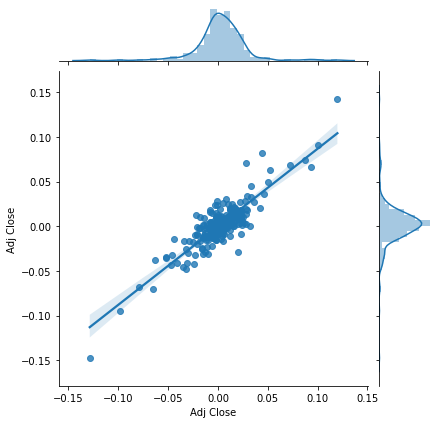

In [15]:
g = (sns.jointplot(close_data['AAPL'], close_data['MSFT'], kind="reg"))

In [0]:
close_data_df =  pd.DataFrame(close_data) 

In [17]:
close_data_df.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-05-28,NaN,NaN,NaN,NaN
2019-05-29,-0.004769,-0.015598,-0.009670,-0.009388
2019-05-30,0.005187,0.001335,0.006323,-0.001578
2019-05-31,-0.018116,-0.012809,-0.016305,-0.022711
2019-06-03,-0.010110,-0.061071,-0.031048,-0.046409


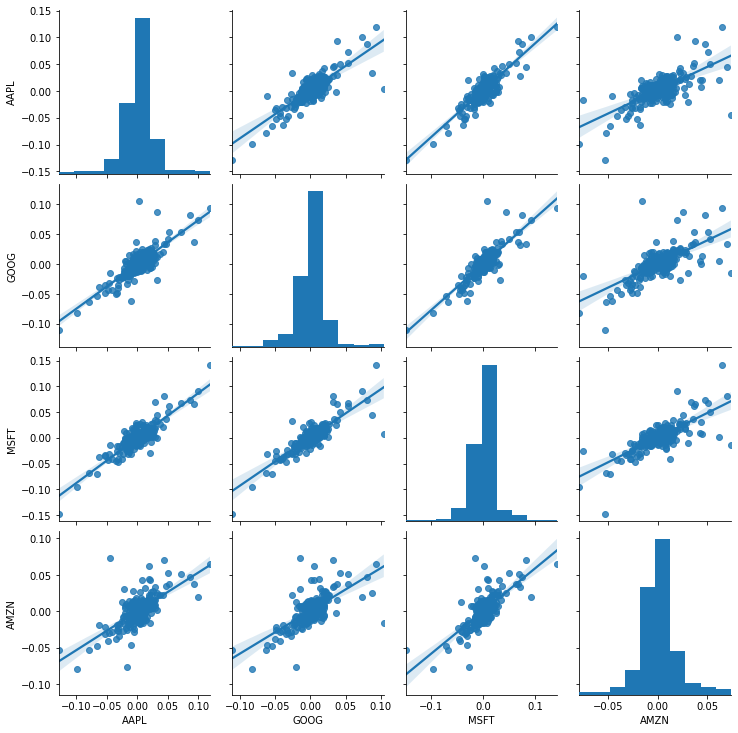

In [18]:
#We check for correlation
g = sns.pairplot(close_data_df, kind="reg")

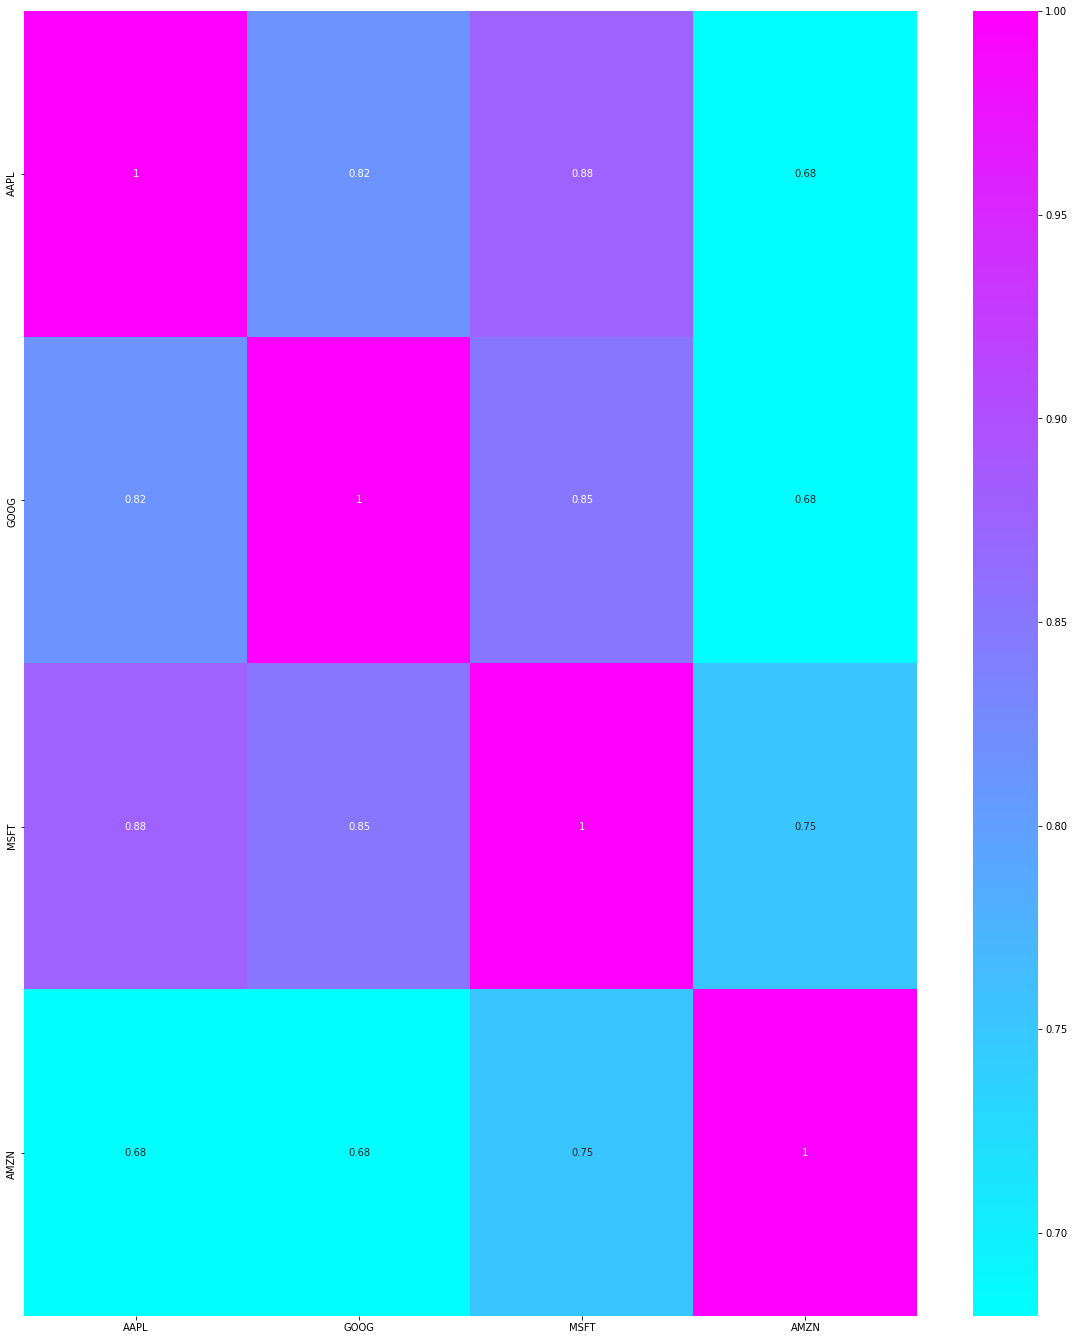

In [19]:
plt.figure(figsize = (20,24))

sns.heatmap(close_data_df.corr(), annot=True, cmap='cool')


In [0]:
close_data_df = close_data_df.dropna()

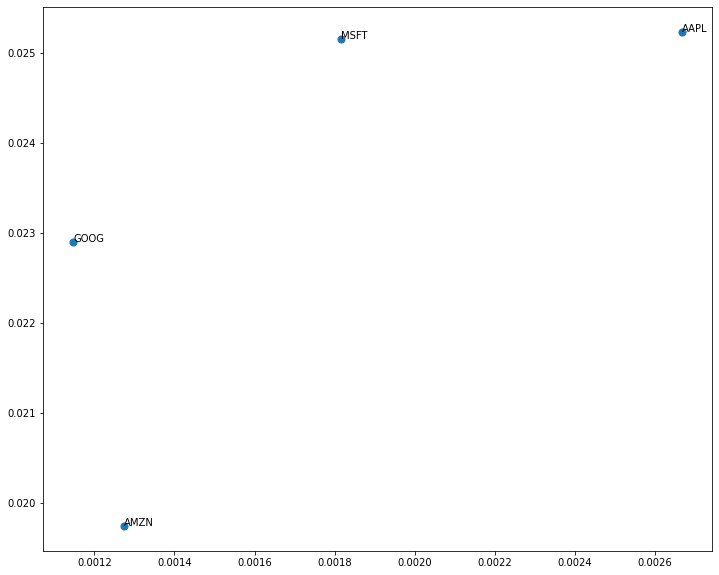

In [21]:
# Modelling the risk
plt.figure(figsize=(12, 10))

plt.scatter(close_data_df.mean(), close_data_df.std(),s= (50))

for i in tech_list:
    plt.annotate(i,xy = (close_data_df[i].mean(),close_data_df[i].std()))


In [0]:
AAPL =  DataReader('AAPL', 'yahoo', start='2013-06-01', end = datetime.now())

In [23]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-06-03,64.622856,63.211430,64.389999,64.388573,93088100.0,56.938175
2013-06-04,64.918571,63.912857,64.745712,64.187141,73182200.0,56.760036
2013-06-05,64.388573,63.387142,63.664288,63.587143,72647400.0,56.229465
2013-06-06,63.857143,62.007141,63.638573,62.637142,104233500.0,55.389381
2013-06-07,63.320000,61.824287,62.357143,63.115715,101133900.0,55.812584


In [89]:
# Lstm to predict stock price
data = AAPL.filter(['Close'])

dataset = data.values
training_data_len = int(len(dataset) * .75 )
print(training_data_len)
data

1319


,Close
Date,
2013-06-03,64.388573
2013-06-04,64.187141
2013-06-05,63.587143
2013-06-06,62.637142
2013-06-07,63.115715
...,...
2020-05-20,319.230011
2020-05-21,316.850006
2020-05-22,318.890015


In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
dataset_Scaled = scaler.fit_transform(dataset.reshape(-1,1))
train_data = dataset_Scaled[0:training_data_len, :]

train_data.shape

(1319, 1)

In [0]:
x_train , y_train = [],[]
for i in range(50, len(train_data)):
    x_train.append(train_data[i-50:i, 0])
    y_train.append(train_data[i, 0])

In [0]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [32]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1269, 50, 1)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, GRU,LSTM

model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape= (50, 1)))
model.add(LSTM(50, return_sequences=False))

model.add(Dense(20))
model.add(Dense(1))





In [0]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [65]:
model.fit(x_train, y_train, batch_size=1, epochs=1)


Epoch 1/1
1269/1269 [==============================] - 307s 242ms/step - loss: 6.1600e-04


In [0]:
test_data = dataset_Scaled[training_data_len - 50: , :]

x_test   = []

y_test = np.array(dataset_Scaled[training_data_len:, :])

for i in range(50,len(test_data)):
    x_test.append(test_data[i-50:i,0])



In [68]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], 50, 1 ))

x_test


array([[[0.48934417],
        [0.48897513],
        [0.47771825],
        ...,
        [0.58607943],
        [0.58770338],
        [0.5901762 ]],

       [[0.48897513],
        [0.47771825],
        [0.48070777],
        ...,
        [0.58770338],
        [0.5901762 ],
        [0.59674577]],

       [[0.47771825],
        [0.48070777],
        [0.47686938],
        ...,
        [0.5901762 ],
        [0.59674577],
        [0.60324152]],

       ...,

       [[0.70853936],
        [0.81830306],
        [0.68632092],
        ...,
        [0.9481077 ],
        [0.97058451],
        [0.96180045]],

       [[0.81830306],
        [0.68632092],
        [0.72562767],
        ...,
        [0.97058451],
        [0.96180045],
        [0.96932966]],

       [[0.68632092],
        [0.72562767],
        [0.70278175],
        ...,
        [0.96180045],
        [0.96932966],
        [0.96135757]]])

In [69]:
pred = model.predict(x_test)
pred = scaler.inverse_transform(pred)

pred

array([[218.34982],
       [219.05548],
       [219.8953 ],
       [221.03851],
       [222.4323 ],
       [224.08237],
       [225.79192],
       [227.2459 ],
       [228.08626],
       [228.3608 ],
       [228.02702],
       [227.91304],
       [227.6485 ],
       [227.83727],
       [228.00015],
       [227.59154],
       [226.95984],
       [226.26799],
       [225.7572 ],
       [225.16396],
       [224.87894],
       [224.90755],
       [224.93835],
       [225.39853],
       [226.11258],
       [227.04605],
       [228.20375],
       [229.63904],
       [230.71082],
       [231.15923],
       [231.18839],
       [231.27306],
       [230.3851 ],
       [228.90266],
       [227.93793],
       [226.86823],
       [226.30246],
       [225.956  ],
       [225.28493],
       [224.81941],
       [224.6178 ],
       [224.76945],
       [224.3835 ],
       [224.2027 ],
       [223.80305],
       [222.95284],
       [222.03923],
       [221.68051],
       [221.95222],
       [221.16647],


In [81]:
rmse = np.sqrt(np.mean(((pred - y_test) ** 2)))
print(rmse)


234.23850494363174


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


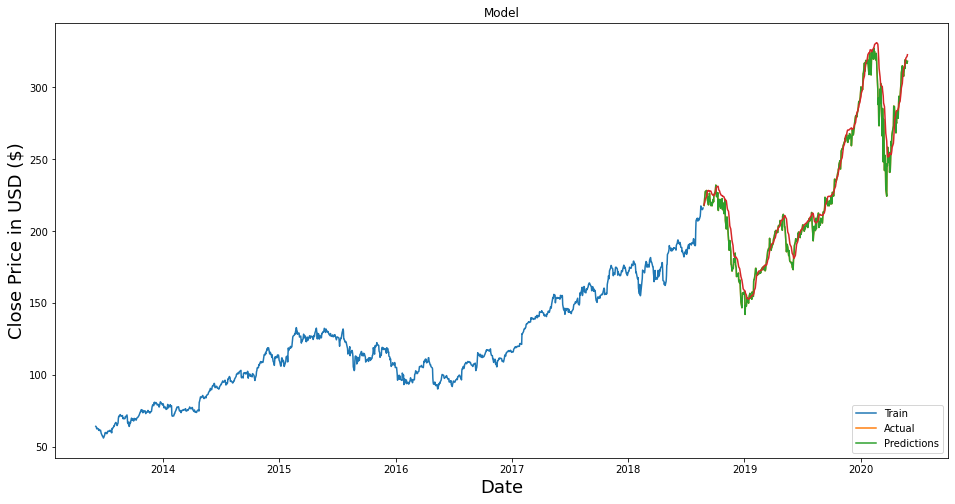

In [106]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price in USD ($)', fontsize=18)
train = data[:training_data_len]
df = data[training_data_len:]
df['Predictions'] = pred

Null = (np.zeros(training_data_len)==1)
plt.plot(train['Close'])
plt.plot(data[training_data_len:]['Close'])
plt.plot(df[['Close','Predictions']])


plt.legend(['Train', 'Actual', 'Predictions'], loc='lower right')
